In [1]:
import pandas as pd


In [2]:
df= pd.read_csv("mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
from sklearn import preprocessing 

le =preprocessing.LabelEncoder()

for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [5]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [7]:
y = df['class']

df.drop(['class'],axis=1,inplace = True)

In [9]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [11]:
y.head()
x=df

In [40]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)
ytest

1971    0
6654    1
5606    1
3332    0
6988    1
5761    1
5798    1
3064    1
1811    0
3422    0
3555    0
5317    1
706     0
1075    0
233     0
3480    0
1557    0
7634    1
828     0
2534    0
736     0
856     0
7088    1
3624    0
5129    1
1656    0
2574    0
3113    0
2753    0
1566    1
       ..
4084    1
4054    0
6711    1
84      0
6797    1
1650    0
4053    1
5505    1
7475    1
5574    1
4568    1
418     0
4251    1
2802    0
3346    1
4387    1
5040    1
2845    0
293     0
5939    0
4216    1
4371    1
6680    1
5888    1
7657    1
7374    1
1149    0
4999    1
7497    1
3341    1
Name: class, Length: 1625, dtype: int64

In [18]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(xtrain,ytrain)
yhat=reg.predict(xtest)

In [21]:
yhat[:10]
from sklearn.metrics import classification_report

In [22]:
report = classification_report(ytest, yhat)
print(report)

             precision    recall  f1-score   support

          0       0.95      0.95      0.95       843
          1       0.94      0.95      0.94       782

avg / total       0.95      0.95      0.95      1625



In [41]:
from pandas import DataFrame

adf=yhat
adf=DataFrame(adf,columns=["predicted"])
adf['actual']=ytest.values

In [45]:
adf.describe()

,predicted,actual
count,1625.000000,1625.000000
mean,0.483077,0.481231
std,0.499867,0.499801
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


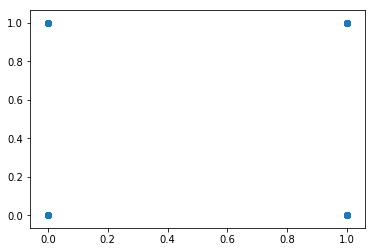

In [44]:
import matplotlib.pyplot as plt
plt.scatter(adf["predicted"],adf["actual"])
plt.show()